In [29]:
import pandas  as pd

table = pd.read_csv("WeiboCrawler/user.csv")
table=table[['content','created_at','like_num','location']]
table.dropna(axis=0, inplace=True)  # 删除包含空值的行
print(table.isna().any())
print(len(table))
table.to_csv('processed.csv', index=False)
with open('comments.txt', 'w') as f:
    for item in table['content']:
        line = ''.join(item) + '\n'
        line.replace(' ','')
        f.write(line)




content       False
created_at    False
like_num      False
location      False
dtype: bool
1156


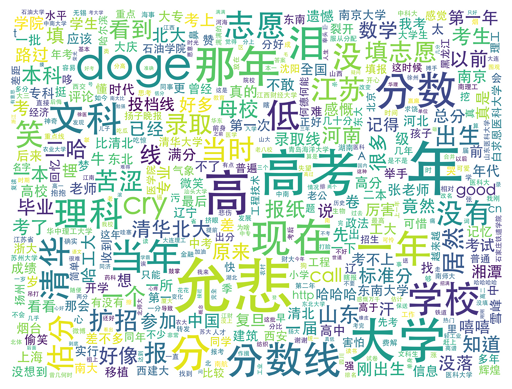

In [35]:
# 生成词云图
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image

import jieba

# 数据获取
with open("comments.txt",'r')as f:
    text=f.read()

# with open('dream is possible.txt','r',encoding='gbk')as f:
#     text=f.read()
#图片获取
# mask=np.array(Image.open("C:\heart.png"))


f_stop=open('stop.txt')
# 将stopwords_path文件打开
f_stop_text=f_stop.read()
# 将文件内容读到f_stop_text
f_stop.close()
#创建mywordlist空列表
f_stop_seg_list=f_stop_text.split('\n')


font='STHeiti Medium.ttc'
sep_list=jieba.cut(text)
sep_list=" ".join(sep_list)
wc=WordCloud(
    scale=4,#调整图片大小---（如果设置太小图会很模糊）
    font_path=font,#使用的字体库
    max_words=500,  # 词云显示的最大词数
    background_color='white', #背景颜色
    max_font_size=200,
    # min_font_size=1,
    stopwords=f_stop_seg_list, #屏蔽的内容
    collocations=False, #避免重复单词
    width=1600,height=1200 #图像宽高，字间距
)

wc.generate(sep_list) #制作词云
wc.to_file('词云.jpg') #保存到当地文件

# 图片展示
plt.figure(dpi=100) #通过这里可以放大或缩小
plt.imshow(wc,interpolation='catrom')
plt.axis('off')
plt.show()